In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
classifier=Sequential()

In [3]:
classifier.add(Convolution2D(32,3,3,
                  input_shape=(64,64,3),
                    activation='relu'))

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
# classifier.add(Convolution2D(32,3,3,activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [6]:
classifier.add(Flatten())

In [7]:
classifier.add(Dense(output_dim=128,
                    activation='relu'))

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  


In [8]:
classifier.add(Dense(output_dim=1,
                    activation='sigmoid'))

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [9]:
classifier.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
training_set = train_datagen.flow_from_directory(
        'dataset/training_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        'dataset/test_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 2000 images belonging to 2 classes.


In [14]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=25,
        validation_data=test_set,
        validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 796s 99ms/step - loss: 0.3688 - accuracy: 0.8262 - val_loss: 0.6696 - val_accuracy: 0.7899
Epoch 2/25
8000/8000 [==============================] - 772s 96ms/step - loss: 0.1051 - accuracy: 0.9602 - val_loss: 0.9504 - val_accuracy: 0.7894
Epoch 3/25
8000/8000 [==============================] - 809s 101ms/step - loss: 0.0551 - accuracy: 0.9804 - val_loss: 1.0969 - val_accuracy: 0.7875
Epoch 4/25
8000/8000 [==============================] - 800s 100ms/step - loss: 0.0404 - accuracy: 0.9864 - val_loss: 0.8262 - val_accuracy: 0.7859
Epoch 5/25
8000/8000 [==============================] - 764s 96ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 1.0323 - val_accuracy: 0.7834
Epoch 6/25
8000/8000 [==============================] - 766s 96ms/step - loss: 0.0269 - accuracy: 0.9909 - val_loss: 2.3282 - val_accuracy: 0.7893
Epoch 7/25
8000/8000 [==============================] - 763s 95ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss:

In [15]:
import numpy as np
from keras.preprocessing import image

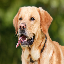

In [73]:
test_image1=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image2=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64,64))
test_image1

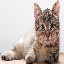

In [74]:
test_image2

In [75]:
test_image1=image.img_to_array(test_image1)
test_image2=image.img_to_array(test_image2)

In [76]:
test_image1=np.expand_dims(test_image1,axis=0)
test_image2=np.expand_dims(test_image2,axis=0)

In [77]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [85]:
prediction=classifier.predict(test_image1)
if prediction[0,0]==1:
    prediction='dog'
else:
    prediction='cat'
prediction

'dog'